In [4]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
# Keras functions
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# Keras dataset
from keras.datasets import mnist

# Keras utils
from keras.utils import np_utils

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


# 1. Read MNIST Data Set

In [5]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

# 2. Clean the Data

Reshape

In [6]:
x_train = x_train0.reshape(60000, 28*28)
x_test = x_test0.reshape(10000, 28*28)

Nomalization

In [7]:
x_train -= x_train.min()
x_train = x_train/x_train.max()

Catogorize

In [8]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

Labeling : 
Prime = 0; Not prime = 1

# 3. Build the Model

In [10]:
from keras.models import Model
from keras.layers import Input

In [11]:
f_1 = Dense(500, activation='sigmoid')

f_2 = Dense(500, activation='sigmoid')
f_3 = Dense(500, activation='sigmoid')

f_5 = Dense(500, activation='relu')
f_6 = Dense(500, activation='relu')

f_4 = Dense(10, activation='softmax')

In [12]:
from keras.layers import concatenate, add

In [13]:
x = Input(shape=(784,))

h_1 = f_1(x)
h_2u = f_2(h_1)
h_2d = f_5(h_1)
h_3u = f_3(h_2u)
h_3d = f_6(h_2d)

ud = concatenate([h_3u, h_3d])

y = f_4(ud)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model_prime = Model(x, y)
model_prime.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          250500      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 500)          250500      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (D

In [15]:
from keras.optimizers import Adam
from keras.optimizers import Adadelta

In [16]:
model_prime.compile(loss='mse', optimizer=Adadelta(lr=1), metrics=['accuracy'])

In [20]:
history_prime = model_prime.fit(x_train, y_train, batch_size=100, epochs=20,
                        verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 58s 970us/step - loss: 0.0146 - acc: 0.9037 - val_loss: 0.0192 - val_acc: 0.8828
Epoch 2/20
60000/60000 [==============================] - 56s 934us/step - loss: 0.0132 - acc: 0.9128 - val_loss: 0.0160 - val_acc: 0.9004
Epoch 3/20
60000/60000 [==============================] - 56s 941us/step - loss: 0.0121 - acc: 0.9200 - val_loss: 0.0143 - val_acc: 0.9129
Epoch 4/20
60000/60000 [==============================] - 57s 950us/step - loss: 0.0114 - acc: 0.9255 - val_loss: 0.0134 - val_acc: 0.9184
Epoch 5/20
60000/60000 [==============================] - 59s 984us/step - loss: 0.0106 - acc: 0.9316 - val_loss: 0.0118 - val_acc: 0.9286
Epoch 6/20
60000/60000 [==============================] - 57s 952us/step - loss: 0.0100 - acc: 0.9348 - val_loss: 0.0110 - val_acc: 0.9337
Epoch 7/20
60000/60000 [==============================] - 58s 966us/step - loss: 0.0093 - acc: 0.9394 - val_loss: 0.

# 4. figure

In [21]:
import matplotlib.pyplot as plt

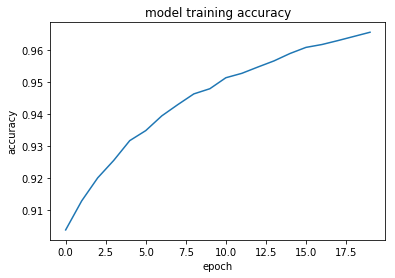

In [23]:
plt.plot(history_prime.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.show()